In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels
import numpy as np

In [2]:
df = pd.read_csv("full_data.csv", encoding="latin")
df

,Unnamed: 0,ward,borough,%_english_is_first_language_of_no_one_in_household_2011,median_house_price_2014,median_household_income_estimate_2012_13,male_life_expectancy_2009_13,female_life_expectancy_2009_13,%_area_that_is_open_space_2014,%_travel_by_bicycle_to_work_2011,turnout_at_mayoral_election_2012,crime_rate_2014_15,%_bame_2011,%_all_older_people_aged_65_2015,%_homes_with_good_access_to_nature,%_homes_with_deficiency_in_access_to_nature,female_life_expectancy_normalised,male_life_expectancy_normalised
0,1,E05000026,Barking and Dagenham,25.7,173000.0,33920.0,80.2,83.9,21.9,0.8,25.7,138.1,71.9,5.0,98.0,2.0,0.996498,1.005313
1,2,E05000027,Barking and Dagenham,7.9,215000.0,32470.0,77.2,80.6,20.6,1.0,20.3,73.6,29.9,10.0,28.0,72.0,0.957303,0.967708
2,3,E05000028,Barking and Dagenham,10.5,210000.0,33000.0,79.0,79.3,1.9,1.6,22.5,79.9,41.2,8.7,83.0,17.0,0.941863,0.990271
3,4,E05000029,Barking and Dagenham,6.5,240500.0,33920.0,79.2,82.2,56.0,1.2,25.3,76.1,37.9,14.2,36.0,64.0,0.976306,0.992778
4,5,E05000030,Barking and Dagenham,4.5,240000.0,37400.0,77.1,81.1,50.4,1.6,24.1,66.7,24.8,14.2,100.0,0.0,0.963242,0.966455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,620,E05000645,Westminster,15.1,715650.0,47340.0,83.3,84.3,32.4,5.9,40.2,57.7,21.8,14.9,0.0,100.0,1.001249,1.044172
620,621,E05000646,Westminster,17.0,840000.0,46550.0,80.0,85.1,26.4,4.3,37.8,82.4,29.3,12.6,59.0,41.0,1.010750,1.002806
621,622,E05000647,Westminster,15.9,857250.0,50250.0,80.7,88.5,4.0,5.9,36.8,138.1,24.0,12.1,69.0,31.0,1.051133,1.011581
622,623,E05000648,Westminster,24.1,499975.0,32390.0,75.1,81.6,19.2,5.1,29.6,75.5,52.8,9.0,87.0,13.0,0.969180,0.941384


**Summary statistics of %_not_bame_2011 which will be 100-%_bame_2011**

In [3]:
size = len(df)
#%_not_bame_2011
df['%_not_bame_2011'] = 100 - df['%_bame_2011']

# middles
mean = df['%_not_bame_2011'].mean() 
mode = df['%_not_bame_2011'].mode()
median = df['%_not_bame_2011'].median()

# spread
min_not_bame = df['%_not_bame_2011'].min()
max_not_bame = df['%_not_bame_2011'].max()
range_not_bame = max_not_bame - min_not_bame
var = df['%_not_bame_2011'].var()
std_dev = df['%_not_bame_2011'].std()

print("size of data set: ", size)
print("mean: ", mean)
print("median: ", median)
print("min percentage of non-bame: ", min_not_bame)
print("max percentage of non-bame: ", max_not_bame)
print("range of percentage of non-bame: ", range_not_bame)
print("variance: ", var)
print("standard deviation: ", std_dev)

size of data set:  624
mean:  61.23108974358971
median:  63.9
min percentage of non-bame:  6.299999999999997
max percentage of non-bame:  95.9
range of percentage of non-bame:  89.60000000000001
variance:  358.1143769806974
standard deviation:  18.923910192682097


<AxesSubplot:>

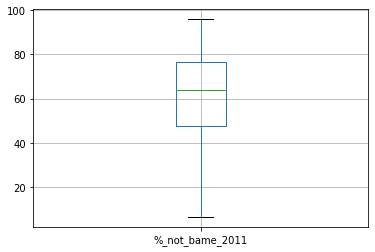

In [4]:
# boxplot
df.boxplot(column='%_not_bame_2011')

Text(67.35419871794869, 61.425000000000004, 'Mean: 61.23')

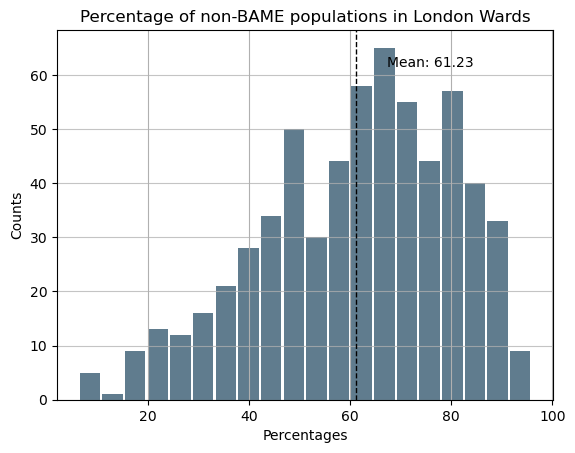

In [5]:
# histogram
df['%_not_bame_2011'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Percentage of non-BAME populations in London Wards')
plt.xlabel('Percentages')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mean))

**Exploratory plots of voter turnout at 2012 mayoral elections against income, age, and % not BAME**

<AxesSubplot:xlabel='%_not_bame_2011', ylabel='turnout_at_mayoral_election_2012'>

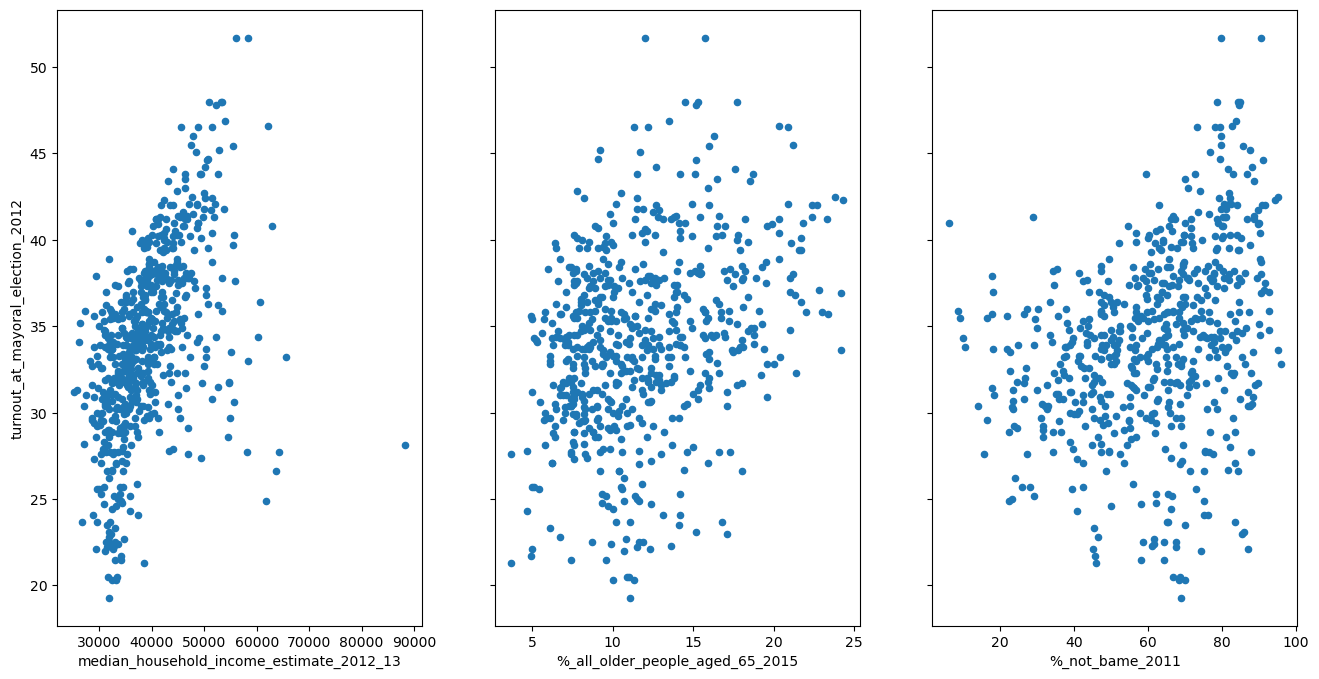

In [6]:
# visualise with scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='median_household_income_estimate_2012_13', y='turnout_at_mayoral_election_2012', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='%_all_older_people_aged_65_2015', y='turnout_at_mayoral_election_2012', ax=axs[1])
df.plot(kind='scatter', x='%_not_bame_2011', y='turnout_at_mayoral_election_2012', ax=axs[2])

<AxesSubplot:xlabel='%_not_bame_2011', ylabel='turnout_at_mayoral_election_2012'>

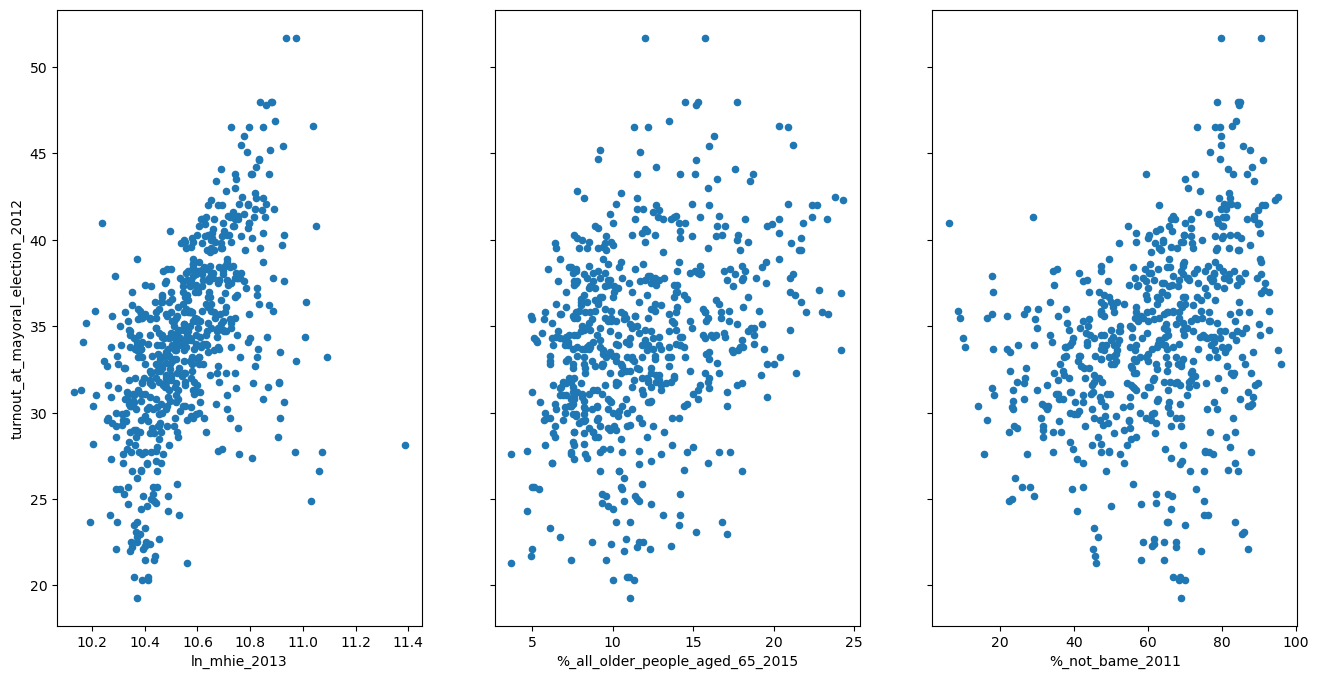

In [7]:
# visualize the relationship between the features and the response using scatterplots
import math
df['ln_mhie_2013'] = df['median_household_income_estimate_2012_13'].transform(lambda x: math.log(x))
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='ln_mhie_2013', y='turnout_at_mayoral_election_2012', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='%_all_older_people_aged_65_2015', y='turnout_at_mayoral_election_2012', ax=axs[1])
df.plot(kind='scatter', x='%_not_bame_2011', y='turnout_at_mayoral_election_2012', ax=axs[2])

**Correlation matrix for all 3 variables**

In [8]:
df_corr = df[['turnout_at_mayoral_election_2012','ln_mhie_2013','%_all_older_people_aged_65_2015', '%_not_bame_2011']]

In [9]:
df_corr.corr()

,turnout_at_mayoral_election_2012,ln_mhie_2013,%_all_older_people_aged_65_2015,%_not_bame_2011
turnout_at_mayoral_election_2012,1.000000,0.541504,0.327602,0.320853
ln_mhie_2013,0.541504,1.000000,0.359382,0.616896
%_all_older_people_aged_65_2015,0.327602,0.359382,1.000000,0.561248
%_not_bame_2011,0.320853,0.616896,0.561248,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

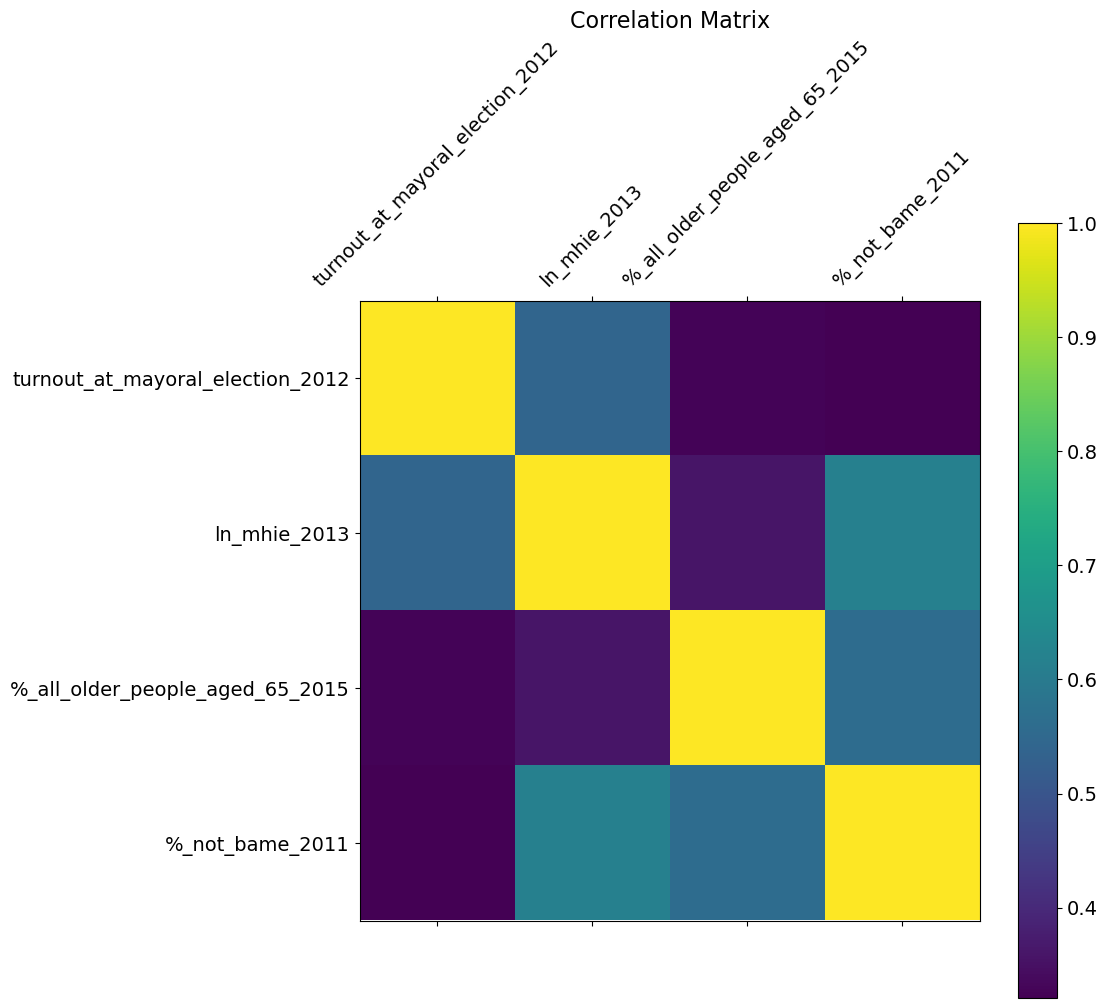

In [10]:
#plotted as a corr matrix
f = plt.figure(figsize=(10, 10))

plt.matshow(df_corr.corr(), fignum=f.number)

plt.xticks(range(df_corr.select_dtypes(['number']).shape[1]), df_corr.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_corr.select_dtypes(['number']).shape[1]), df_corr.select_dtypes(['number']).columns, fontsize=14)
#shape[1] is the 4 variables ie 1st row 

cb = plt.colorbar()

cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [11]:
#changing % to pc for relevant variables to get multireg working
df = df.rename(columns= {"%_bame_2011": "pc_bame_2011",
                         "%_all_older_people_aged_65_2015": "pc_all_older_people_aged_65_2015",
                         "%_not_bame_2011": "pc_not_bame_2011"
                        })

running multiregression

In [18]:
model_voter = smf.ols('turnout_at_mayoral_election_2012 ~ ln_mhie_2013 + pc_all_older_people_aged_65_2015 + pc_not_bame_2011', 
                        df).fit()
model_voter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     turnout_at_mayoral_election_2012   R-squared:                       0.322
Model:                                          OLS   Adj. R-squared:                  0.319
Method:                               Least Squares   F-statistic:                     98.25
Date:                              Tue, 06 Dec 2022   Prob (F-statistic):           4.90e-52
Time:                                      14:35:23   Log-Likelihood:                -1808.5
No. Observations:                               624   AIC:                             3625.
Df Residuals:                                   620   BIC:                             3643.
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -140.0164     12.807    -10.933      0.000    -165.166    -114.867
ln_mhie_2013                        16.4228      1.254     13.097      0.000      13.960      18.885
pc_all_older_people_aged_65_2015     0.2562      0.050      5.125      0.000       0.158       0.354
pc_not_bame_2011                    -0.0377      0.013     -2.819      0.005      -0.064      -0.011
==============================================================================
Omnibus:                       47.956   Durbin-Watson:                   1.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.511
Skew:                          -0.630   Prob(JB):                     2.67e-14
Kurtosis:                       3.904   Cond. No.                     4.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p-value (Prob (F-Statistic)) is less than 0.05. 

**Checking multicollinearity using VIF**

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
        
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

compute_vif(['turnout_at_mayoral_election_2012','ln_mhie_2013','pc_all_older_people_aged_65_2015', 'pc_not_bame_2011'])

/tmp/ipykernel_769/3944882533.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,turnout_at_mayoral_election_2012,1.475418
1,ln_mhie_2013,2.061820
2,pc_all_older_people_aged_65_2015,1.522330
3,pc_not_bame_2011,2.079503


VIF for all variables are less than 5, so unlikely to have issue with multicollinearity. Large condition number might then be due to median household income (estimated) needing more standardisation, or could be ignored

For more accurate results, we might use equivalised income to account for household structure etc

# Add DW and JB 

In [14]:
# Durbin Watson Test Statistic
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model_voter.resid)

1.1510875969021472

In [16]:
#jb test
from statsmodels.stats.stattools import jarque_bera
jarque_bera(model_voter.resid)

(62.51087410663717,
 2.6664666623975757e-14,
 -0.6298747603670942,
 3.9040439888228873)